<a href="https://colab.research.google.com/github/Thinkeraty/Colab/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/whitehatjr/datasets/master/c117/heart.csv')

In [ ]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [ ]:
from sklearn.model_selection import train_test_split
age = df["age"]
heart_attack = df["target"]
age_train, age_test, heart_attack_train, heart_attack_test = train_test_split(age, heart_attack, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X = np.reshape(age_train.ravel(), (len(age_train), 1))
Y = np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))
classifier= LogisticRegression(random_state=0)
classifier.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test = np.reshape(age_test.ravel(), (len(age_test), 1))
Y_test = np.reshape(heart_attack_test.ravel(), (len(heart_attack_test), 1))
heart_attack_prediction = classifier.predict(X_test)
predicted_values = []

for i in heart_attack_prediction:
  if i == 0:
    predicted_values.append("no")
  else:
    predicted_values.append("yes")

actual_values = []

for i in Y_test.ravel():
  if i == 0:
    actual_values.append("no")
  else:
    actual_values.append("yes")

[Text(0, 0.5, 'yes'), Text(0, 1.5, 'no')]

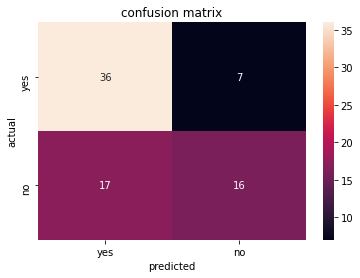

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ["yes", "no"]
cm = confusion_matrix(actual_values, predicted_values, labels)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("confusion matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

36 people both actually got a heart attack and were predicted to get a heart attack. <br>
16 people didn't get a heart attack and weren't predicted to get a heart attack either.<br>
7 people got a heart attack but were not predicted to get a heart attack.<br>
17 people didn't get a heart attack but they were predicted to get it.

In [ ]:
accuracy = (36+16)/(36+16+17+7)
print(accuracy)

0.6842105263157895


In [ ]:
factors = df[["age", "sex", "cp", "chol", "thalach"]]
heart_attack = df["target"]

factors_train, factors_test, heart_attack_train, heart_attack_test = train_test_split(factors, heart_attack, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.fit_transform(factors_test)

In [ ]:
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(factors_train, heart_attack_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
heart_attack_predictions_1 = classifier2.predict(factors_test)
predicted_values_1 = []

for i in heart_attack_predictions_1:
  if i == 0:
    predicted_values_1.append("no")
  else:
    predicted_values_1.append("yes")

actual_values_1 = []

for i in heart_attack_test.ravel():
  if i == 0:
    actual_values_1.append("no")
  else:
    actual_values_1.append("yes")

[Text(0, 0.5, 'yes'), Text(0, 1.5, 'no')]

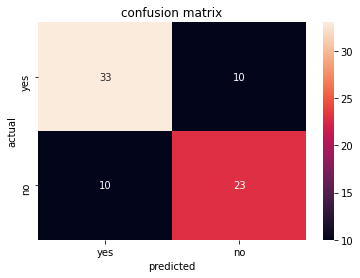

In [ ]:
labels = ["yes", "no"]
cm = confusion_matrix(actual_values_1, predicted_values_1, labels)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("confusion matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

33 people both actually got a heart attack and were predicted to get a heart attack. <br>
23 people didn't get a heart attack and weren't predicted to get a heart attack either.<br>
10 people got a heart attack but were not predicted to get a heart attack.<br>
10 people didn't get a heart attack but they were predicted to get it.

In [ ]:
accuracy = (33+23)/(33+10+10+23)
print(accuracy)

0.7368421052631579
